In [2]:
from pathlib import Path 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [3]:
file_path = Path("../data/example_data.hd5")
df = pd.read_hdf(file_path)
df = df.reset_index()
df = df.pivot(index='DateTime', columns='PropertyID', values='Value')
df.columns = [str(col) for col in df.columns]
df = df.reset_index()
df.rename(columns={'DateTime':'date'}, inplace=True)
df.fillna(method='ffill', inplace=True)
df = df.sort_values(by='date')
df.head()

,date,300468,300498,305256,315036,340686,341124,341550
0,2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
1,2020-01-01 00:00:30,59.085239,2036.845581,67.127098,114.388023,1.691197,5.378604,1.403499
2,2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
3,2020-01-01 00:01:30,74.437500,2036.780151,71.723625,114.293983,1.830390,5.459568,1.512679
4,2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172


In [4]:
def min_max_scaling_df(df):
    min_vals = df.min()
    max_vals = df.max()
    scaled_df = (df - min_vals) / (max_vals - min_vals)
    return scaled_df

def inverse_min_max_scaling_df(scaled_df, min_vals, max_vals):
    original_df = (scaled_df * (max_vals - min_vals)) + min_vals
    return original_df

In [5]:
property_columns = ['300468', '300498', '305256', '315036', '340686', '341124','341550']
for col in property_columns:
    df[col] = min_max_scaling_df(df[col])

In [6]:
# Train-test split (you can adjust the split ratio)
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

Working on sensor: 300468
MSE for 300468: 0.01598305152267196


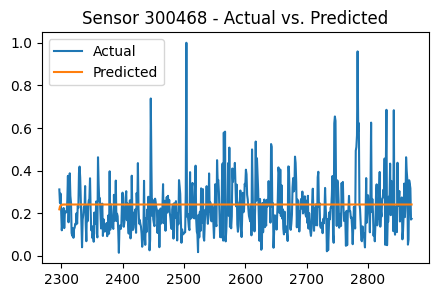

Working on sensor: 300498
MSE for 300498: 0.08034701311631569


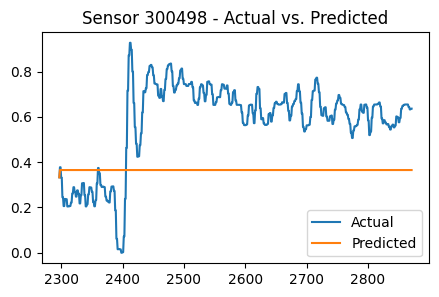

Working on sensor: 305256
MSE for 305256: 0.05791143001072815


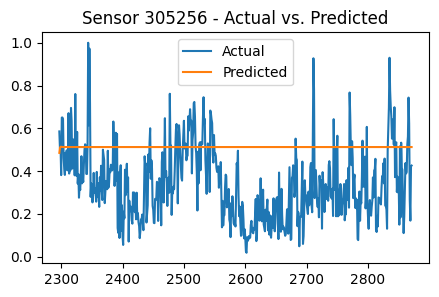

Working on sensor: 315036
MSE for 315036: 0.18552940326718984


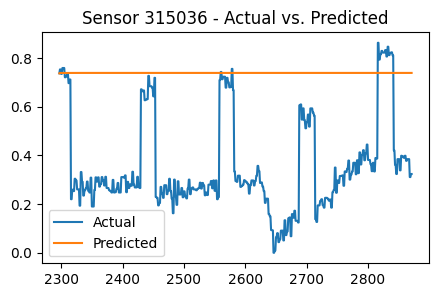

Working on sensor: 340686
MSE for 340686: 0.004271578912532661


/home/hassanahmed/miniconda3/envs/tstoolkit/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


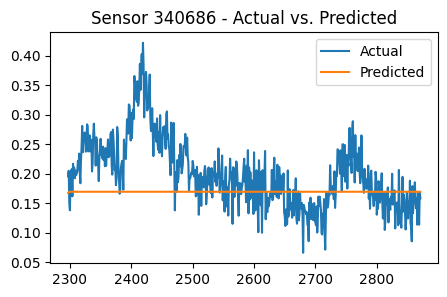

Working on sensor: 341124
MSE for 341124: 0.000325327975444679


/home/hassanahmed/miniconda3/envs/tstoolkit/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


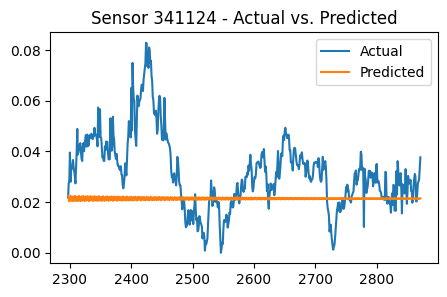

Working on sensor: 341550
MSE for 341550: 0.05466109023023909


/home/hassanahmed/miniconda3/envs/tstoolkit/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


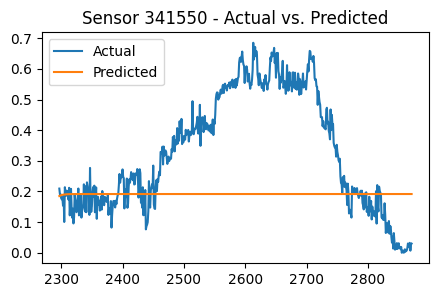

In [7]:
property_columns = ['300468', '300498', '305256', '315036', '340686', '341124','341550']

# Iterate through each sensor column
for property_id in property_columns:
    print(f"Working on sensor: {property_id}")
    
    train_series = train_df[property_id]
    test_series = test_df[property_id]
    
    # Train ARIMA model
    model = ARIMA(train_series, order=(2, 1, 3))  # You can adjust the order
    fitted_model = model.fit()
    #print(fitted_model.summary())
    
    # Predict
    start_idx = len(train_series)
    end_idx = len(train_series) + len(test_series) - 1
    predictions = fitted_model.predict(start=start_idx, end=end_idx)
    
   # Evaluate (you can use different metrics)
    mse = ((predictions - test_series) ** 2).mean()
    print(f"MSE for {property_id}: {mse}")

    # Visualize
    plt.figure(figsize=(5, 3))
    plt.plot(test_series.index, test_series, label='Actual')
    plt.plot(test_series.index, predictions, label='Predicted')
    plt.title(f"Sensor {property_id} - Actual vs. Predicted")
    plt.legend()
    plt.show()
